In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fungiinfo = pd.read_csv('AllfungiData.csv',header =0) #moisture To 是容忍度
tempCurve = pd.read_csv('curves_temperature.csv',header=0)
moisCurve = pd.read_csv('curve_moisture.csv',header = 0)
tempCurve['tempaxis'] = np.around(tempCurve['tempaxis'],2)

In [2]:
fungiinfo.drop(labels=[34,35],axis=0,inplace=True)

names = fungiinfo['name3']
maxx = []

for item in names:
    print(item)
    trymax1 = np.max(tempCurve[item])
    trymax2 = np.max(moisCurve[item])
    trymax3 = fungiinfo[fungiinfo['name3']==item]['rate.0.5'].tolist()
    trymax3.append(trymax2)
    trymax3.append(trymax1)
    #print(trymax3)
    maxx.append([trymax2,trymax1,np.max(trymax3)])#湿度 温度 最高
fungiMax = dict(zip(names,maxx))
fungiMax

a.gal1.s
a.gal10.n
a.gal2.s
a.gal3.s
a.gal5.s
a.gal6.n
a.gal8.n
a.gal9.n
a.sin.n
a.tab.n
a.tab.s
f.fom.n
h.crust.n
h.seti.n
h.seti.s
l.conif.n
l.crin.s
m.meri.s
m.trem.n
m.trem.s
p.flav.n
p.flav.s
p.gilv.n
p.har.n
p.pend.n
p.robin.n
p.robin.s
p.rufa.acer.n
p.rufa.acer.s
p.sang.s
s.comm.n
s.comm.s
t.chion.n
x.sub.s


{'a.gal1.s': [0.389915068, 0.4150107685623335, 0.4150107685623335],
 'a.gal10.n': [0.5684020441, 0.7339472801834307, 0.7339472801834307],
 'a.gal2.s': [0.3612117205, 0.33883234660928313, 0.3612117205],
 'a.gal3.s': [0.2943130623, 0.2980726460036734, 0.2980726460036734],
 'a.gal5.s': [0.5551475417, 0.3908232125806141, 0.5551475417],
 'a.gal6.n': [0.3526340585, 0.5493246543059528, 0.5493246543059528],
 'a.gal8.n': [0.4593625938000001, 0.6256631160638594, 0.6256631160638594],
 'a.gal9.n': [0.688112713, 0.9588987472367032, 0.9588987472367032],
 'a.sin.n': [0.7389892841, 0.9624347775539532, 0.9624347775539532],
 'a.tab.n': [0.4455799667, 1.123562796958203, 1.123562796958203],
 'a.tab.s': [1.01992071, 1.6127679479382035, 1.6127679479382035],
 'f.fom.n': [4.7778153577, 7.55010790335181, 7.55010790335181],
 'h.crust.n': [1.9115288596, 1.6944463438297404, 1.96],
 'h.seti.n': [4.726253434, 8.024666980843943, 8.024666980843943],
 'h.seti.s': [4.8050310583, 6.358799547463748, 6.358799547463748],
 

In [3]:

def getV(mois,temp,name):
    maxx = fungiMax[name]
    getmois = moisCurve[moisCurve['wateraxis']==mois][name].tolist()
    gettemp = tempCurve[tempCurve['tempaxis']==temp][name].tolist()
    getmois=getmois[0]
    #print(gettemp)
    #print(str(temp))
    gettemp=gettemp[0]
    
    r1 = getmois/maxx[0]
    r2 = gettemp/maxx[1]

    r = 2*(r1*r2)/(r1+r2)
    f = maxx[2]*r
    
    getmoisT = fungiinfo[fungiinfo['name3']==name]['moisture To'].tolist()
    g = getmoisT[0]
    lvi = -0.32 + 0.23*f + 0.22*g+ -0.038*f*g 
    
    result = np.exp(lvi)
    return result,f
    
def LotkaVolterra(moislist,templist,namelist):
    decomposite_all = np.zeros(len(moislist))
    #时间长度在给定的list里都有了0.0
    #先对每个初始化吧;
    dictfungi = {}
    for name in namelist:
        dictfungi[name] = [[],[1],[1]]#这里还没想好但总而言之是多个列表啊 第一个存当前的v？第二个存当前的N 第三个存当前的N*V
    for days in range(len(moislist)):
        

        filist  = []
        vilist = []
        for name in namelist:
            vi,fi = getV(moislist[days],templist[days],name)
            #dictfungi[name][0].append([vi,fi])
            filist.append(fi)
            vilist.append(vi)
        #对fi 归一化 min-max scaling 
        maxfi = max(filist)
        filist = np.array(filist)
        filist = filist/maxfi
        for index in range(len(filist)):
            name = namelist[index]
            dictfungi[name][0].append([vilist[index],filist[index]])
        
        
        for name in namelist:
            fi = dictfungi[name][0][days][1]
            #print(str(fi))
            vi = dictfungi[name][0][days][0]
            #print(str(vi))
            N = dictfungi[name][1][days]
            #print(str(N)+'day'+str(days))
            sumup=0
            for name1 in namelist:
                    sumup = sumup + dictfungi[name1][0][days][1]/fi*dictfungi[name1][1][days]/100#1k为设定的环境容纳量/好像太大了换成100 
            dsize = fi*N*(1-sumup) 
            size =max(N +dsize,0) #总而言之是不能小于零的啊qaq
            dictfungi[name][1].append(size)
            dictfungi[name][2].append(vi*size)
            decomposite_all[days]=decomposite_all[days]+vi*size
            
    

    return dictfungi,decomposite_all

In [116]:
#task3 的数据获取
# Af_m 热带雨林 Am_m 树稀 CfDs_m 温带 Df_m 半干旱 BS 干旱
Af_m = np.append(np.ones(5)*(-0.3),np.around(np.random.normal(loc=-0.3,scale=0.05,size=50),2))
Am_m = np.append(np.ones(5)*(-0.5),np.around(np.random.normal(loc=-0.5,scale=0.05,size=50) ,2))
CfDs_m = np.append(np.ones(5)*(-0.7),np.around(np.random.normal(loc=-0.7,scale=0.05,size=50) ,2))
#Aw_m = np.append(np.ones(5)*(-0.9),np.around(np.random.normal(loc=-0.9,scale=0.05,size=50) ,2))
Df_m = np.append(np.ones(5)*(-1.2),np.around(np.random.normal(loc=-1.2,scale=0.05,size=50) ,2))
BS = np.append(np.ones(5)*(-2),np.around(np.random.normal(loc=-2,scale=0.05,size=50),2))
# A热带 C 温带 D 温度--（我也不知道怎么说qaq
A_t = np.append(np.ones(5)*27,np.around(np.random.normal(loc = 27,scale=2,size=50),2))
C_t = np.append(np.ones(5)*20.6,np.around(np.random.normal(loc = 20.6,scale=2,size=50),2))
D_t = np.append(np.ones(5)*13.1,np.around(np.random.normal(loc=13.1,scale=2,size=50),2))
overAt =  np.append(np.ones(5)*35,np.around(np.random.normal(loc = 35,scale=2,size=50),2))

In [111]:
#task 2的数据获取
subnamelist = names[0:34].tolist()
tempreture = np.ones(55)*30
# templet = np.random.normal(loc=30,scale=5,size=26)
# moiplet = np.random.normal(loc=-0.5,scale=0.2,size=26)
# tempreture = np.zeros(50)
# moisture = np.zeros(50)
# for index in range(0,25):
#     tempreture[2*index]=templet[index]
#     tempreture[2*index+1]=(templet[index]+templet[index+1])/2
#     moisture[2*index]= moiplet[index] 
#     moisture[2*index+1] = (moiplet[index]+moiplet[index+1])/2
# 
# tempreture = np.append(np.ones(5)*30,np.around(tempreture,2))
# moisture = np.append(np.ones(5)*(-0.5),np.around(moisture,2))
# moisture[moisture>0] = 0
#tempreture = np.around(np.random.normal(loc=-0.3,scale=0.05,size=50),2)
#tempreture[10:15] = [30,35,40,45,30]
tempreture[5:55] =np.around(np.linspace(25,50,50),2)
moisture = np.ones(55)*(-0.5)
#moisture[5:55] = np.around(np.linspace(-1,-0.1,50),2)
#moisture[10:15] = [-0.75,-0.5,-0.25,-0.5,-0.75]

In [118]:
name3= []
Means = []
Vars = []
Climate = []
for n in range(34):
    subnamelist = names[n:n+1].tolist()
    theName = subnamelist[0]
    _,decomposition = LotkaVolterra(Af_m,A_t,subnamelist)
    Mean = np.mean(decomposition)
    Var = np.var(decomposition)
    name3.append(theName),Climate.append('tropical rain forests')
    Means.append(Mean),Vars.append(Var)
    
    _,decomposition = LotkaVolterra(Am_m,A_t,subnamelist)
    Mean = np.mean(decomposition)
    Var = np.var(decomposition)
    name3.append(theName),Climate.append('arboreal')
    Means.append(Mean),Vars.append(Var)
    
    _,decomposition = LotkaVolterra(CfDs_m,C_t,subnamelist)
    Mean = np.mean(decomposition)
    Var = np.var(decomposition)
    name3.append(theName),Climate.append('temperate')
    Means.append(Mean),Vars.append(Var)
    
    _,decomposition = LotkaVolterra(Df_m,D_t,subnamelist)
    Mean = np.mean(decomposition)
    Var = np.var(decomposition)
    name3.append(theName),Climate.append('arid')
    Means.append(Mean),Vars.append(Var)
    
    _,decomposition = LotkaVolterra(BS,D_t,subnamelist)
    Mean = np.mean(decomposition)
    Var = np.var(decomposition)
    name3.append(theName),Climate.append('semi-arid')
    Means.append(Mean),Vars.append(Var)
    
singleGenerated = pd.DataFrame({'name3':name3,'Means':Means,'Vars':Vars,'Climate':Climate})

In [120]:
subnamelist = ['p.flav.s','p.flav.n','p.sang.s','l.crin.s','m.trem.n','m.trem.s','p.rufa.acer.n']
testfuninfo,testdecomposition = LotkaVolterra(Am_m,A_t,subnamelist)
cfuninfo,cdecomposition = LotkaVolterra(BS,A_t,subnamelist)

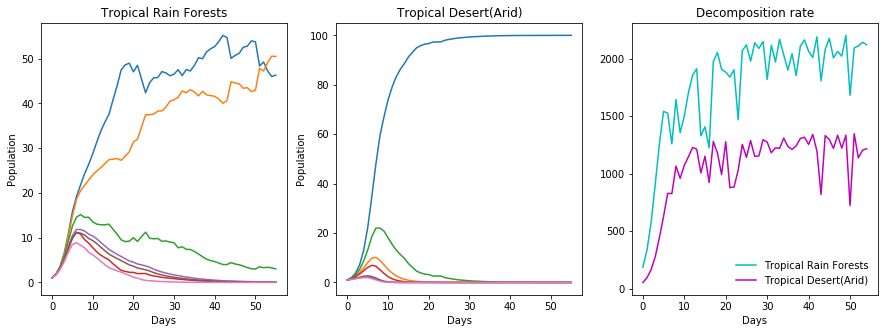

In [124]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5),facecolor='white')
time1 = range(55)
time = range(56)
ax1 = fig.add_subplot(131)
for item in subnamelist:
    N = testfuninfo[item][1]
    plt.plot(time,N,label=item)
plt.title('Tropical Rain Forests')
plt.xlabel("Days")
plt.ylabel("Population")


ax2 = fig.add_subplot(132)
for item in subnamelist:
    N = cfuninfo[item][1]
    plt.plot(time,N,label=item)
plt.title('Tropical Desert(Arid)')
plt.xlabel("Days")
plt.ylabel("Population")

ax3 = fig.add_subplot(133)
plt.plot(time1,testdecomposition,color = 'c',label = 'Tropical Rain Forests')
plt.plot(time1,cdecomposition,color = 'm',label = 'Tropical Desert(Arid)')
plt.title('Decomposition rate')
plt.xlabel("Days")

plt.legend(ncol=1,frameon = False,handlelength=2.0)
#plt.savefig('Desert&Rainforest.jpg')
plt.show()

In [108]:
subnamelist = names[0:34].tolist()
testfuninfo,testdecomposition = LotkaVolterra(moisture,tempreture,subnamelist)

In [5]:
testfuninfo1,testdecomposition1 = LotkaVolterra(moisture,tempreture,subnamelist)

In [112]:
testfuninfo2,testdecomposition2 = LotkaVolterra(moisture,tempreture,subnamelist)

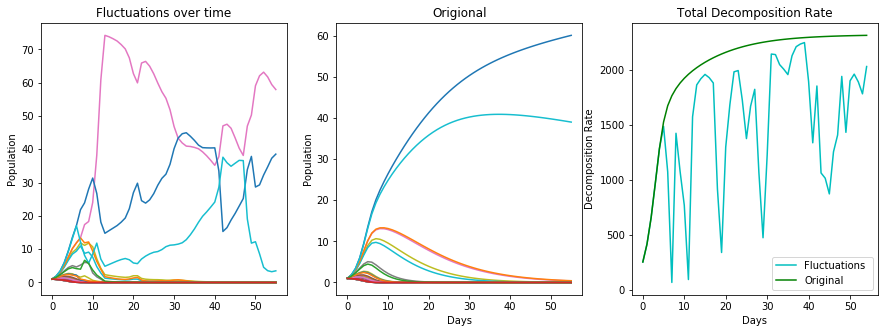

In [114]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5),facecolor='white')
time1 = range(55)

time = range(56)
ax1 = fig.add_subplot(131)
for item in subnamelist:
    N = testfuninfo[item][1]
    plt.plot(time,N,label=item)
plt.title('Fluctuations over time')
#plt.axvline(x=12.5,ls=":",c="gray")
#plt.xlabel("Days")
plt.ylabel("Population")
#ax1.legend()
#plt.annotate('Fluctuation', xy=(12.5,45), xytext=(12.5,52),
#            arrowprops=dict(facecolor='black', shrink=0.01))

# ax2 = fig.add_subplot(222)
# for item in subnamelist:
#     N = testfuninfo1[item][1]
#     plt.plot(time,N,label=item)
# plt.title('Long-term Moisture Rise')
#plt.axvline(x=12.5,ls=":",c="gray")


#plt.annotate('Fluctuation', xy=(12.5,55), xytext=(12.5,62),
#            arrowprops=dict(facecolor='black', shrink=0.01))
ax3 = fig.add_subplot(132)
for item in subnamelist:
    N = testfuninfo2[item][1]
    plt.plot(time,N,label=item)
plt.title('Origional')
#plt.axvline(x=12.5,ls=":",c="gray")
plt.xlabel("Days")
plt.ylabel("Population")

ax4 = fig.add_subplot(133)
plt.plot(time1,testdecomposition,color = 'c',label = 'Fluctuations ')
#plt.plot(time1,testdecomposition1,color = 'm',label = 'Moisture')
plt.plot(time1,testdecomposition2,color = 'g',label = 'Original')
plt.title('Total Decomposition Rate')
plt.xlabel("Days")
plt.ylabel("Decomposition Rate")
ax4.legend()

#plt.savefig('species&flucation_timely0.jpg')
#plt.annotate('Fluctuation', xy=(12.5,45), xytext=(12.5,50),
#            arrowprops=dict(facecolor='black', shrink=0.01))

emm目前跑出来是可以跑？
可视化来检查一下结果

In [200]:
testfuninfo
maxinfo = {}
for keys in tfuninfo4:
    
    thiso = tfuninfo4[keys][1][40]
    maxinfo[keys] = thiso
maxinfo

{'a.gal1.s': 2.5436976346270904e-41,
 'a.gal10.n': 9.253596555591442e-45,
 'a.gal2.s': 1.3763896833136468e-42,
 'a.gal3.s': 5.200454086370138e-45,
 'a.gal5.s': 2.2598865837338107e-39,
 'a.gal6.n': 6.617371358800556e-42,
 'a.gal8.n': 3.1007031520375984e-43,
 'a.gal9.n': 3.745725782520334e-51,
 'a.sin.n': 3.126153677499742e-37,
 'a.tab.n': 8.271733234957927e-33,
 'a.tab.s': 2.5990067397098734e-38,
 'f.fom.n': 3.418783922712563e-30,
 'h.crust.n': 1.1248292569694493e-35,
 'h.seti.n': 4.551117820656711e-19,
 'h.seti.s': 3.921330667743919e-22,
 'l.conif.n': 2.90044546690475e-17,
 'l.crin.s': 1.8262008668373557e-11,
 'm.meri.s': 3.8043165261738625e-38,
 'm.trem.n': 4.9296946585734015e-12,
 'm.trem.s': 3.730445286593015e-10,
 'p.flav.n': 1.4097316800696896e-05,
 'p.flav.s': 99.99998159472433,
 'p.gilv.n': 2.353324763425532e-20,
 'p.har.n': 1.3480154200359017e-25,
 'p.pend.n': 3.042451680598169e-23,
 'p.robin.n': 2.4989136496856234e-23,
 'p.robin.s': 2.1906450562342203e-26,
 'p.rufa.acer.n': 8.

In [23]:
testfuninfo['l.crin.s']


[[[7.452506828976822, 0.7461600154479923],
  [7.452506828976822, 0.7461600154479923],
  [7.452506828976822, 0.7461600154479923],
  [7.452506828976822, 0.7461600154479923],
  [7.452506828976822, 0.7461600154479923],
  [7.452506828976822, 0.7461600154479923],
  [7.917430051643782, 0.7565816941599189],
  [8.394966583636643, 0.7674029075017951],
  [8.88321376940634, 0.778918307515533],
  [9.379979406703859, 0.7915277814374372],
  [9.882736300609277, 0.805758884088864],
  [10.388553220996748, 0.8222934091463869],
  [10.893995621637512, 0.842002553523215],
  [11.394990763076283, 0.8577407625321154],
  [11.88665514406197, 0.8564809702273845],
  [12.363087981785286, 0.8549625371177558],
  [12.817143226583042, 0.8531238841351353],
  [13.240204074226662, 0.8508839340146934],
  [13.621997198161562, 0.8481396563219873],
  [13.95049707583214, 0.8447640814581573],
  [14.211981030467236, 0.8406049611220583],
  [14.391299558253644, 0.835484192434778],
  [14.472420757537568, 0.8291980585491462],
  [14.

In [196]:
singleGenerated
nowis_ = singleGenerated[singleGenerated['Climate']=='arid']
nowis_.sort_values(by='Means',inplace=True)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [197]:
nowis_

,name3,Means,Vars,Climate
18,a.gal3.s,28.370721,68.664112,arid
28,a.gal6.n,29.799991,75.916327,arid
13,a.gal2.s,32.799522,91.776435,arid
168,x.sub.s,34.284491,100.553962,arid
3,a.gal1.s,38.491166,126.391559,arid
48,a.tab.n,40.194458,138.826734,arid
33,a.gal8.n,43.174241,159.181335,arid
23,a.gal5.s,43.775871,163.595144,arid
8,a.gal10.n,45.362636,175.845039,arid
38,a.gal9.n,45.727145,178.861651,arid


In [202]:
namelist = ['m.trem.s','p.flav.s','p.rufa.acer.s']

tfuninfo1,tdecomposition1 = LotkaVolterra(BS,D_t,[namelist[0]])
tfuninfo2,tdecomposition2 = LotkaVolterra(BS,D_t,[namelist[1]])
tfuninfo3,tdecomposition3 = LotkaVolterra(BS,D_t,[namelist[2]])

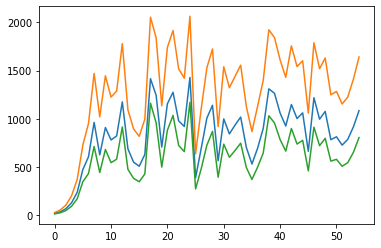

In [191]:
plt.plot(time1,tdecomposition1,label='p.flav.n')
plt.plot(time1,tdecomposition2,label='l.crin.s')
plt.plot(time1,tdecomposition3,label='m.trem.n')
#plt.plot(time1,tdecomposition4,label='combination')
plt.show()

In [201]:





#subnames = names[0:34].tolist()
subnames = ['p.flav.s','p.flav.n','m.trem.s','m.trem.n','p.rufa.acer.s']
#Afjuanwang = ['p.flav.s','p.flav.n','m.trem.s','m.trem.n','p.rufa.acer.s']
tfuninfo4,tdecomposition4 = LotkaVolterra(BS,D_t,subnames)

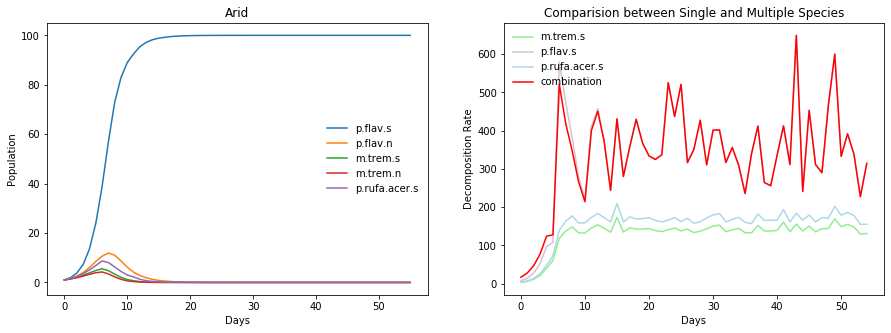

In [204]:
fig = plt.figure(figsize=(15,5),facecolor='white')

ax1 = fig.add_subplot(121)
for item in subnames:
    N = tfuninfo4[item][1]
    plt.plot(time,N,label=item)
plt.title('Arid')
plt.xlabel("Days")
plt.ylabel("Population")
plt.legend(frameon = False)

ax2 = fig.add_subplot(122)
plt.plot(time1,tdecomposition1,color = 'lightgreen',label=namelist[0])
plt.plot(time1,tdecomposition2,color = 'thistle',label=namelist[1])
plt.plot(time1,tdecomposition3,color = 'lightblue',label=namelist[2])
plt.plot(time1,tdecomposition4,color = 'r',label='combination')
plt.legend(frameon = False)
plt.xlabel("Days")
plt.ylabel("Decomposition Rate")
plt.title('Comparision between Single and Multiple Species')

plt.savefig('Arid_t4.jpg')